# MAPK Pathway

#### Author(s):  Marek Kwiatkowski
#### Reference: [Kwiatkowski (2010)](http://mareklab.org/papers/phd.pdf) | [Download](https://cpi-catalog.000webhostapp.com/cpi-files/mapk.cpi)

MAPK cascades are an important component of many signal transduction pathways. Found in all eukaryotes, MAPK cascades help control a number of cellular processes, most notably cell growth and cell division.

Here, we restrict our analysis to a sub-family of MAPK architectures considered in [70] (Fig. 6.2). The initial signal promotes the activation (phosphorylation) of an order 3 protein kinase (MAP-KKK). Once activated, MAPKKK acts as a catalyst for the phosphorylation of an order 2 kinase (MAPKK). Doubly phosphorylated MAPKK activates (again, twice) an order 1 kinase (MAPK), which is considered the output signal of the cascade. Finally, every kinase has a corresponding phosphatase, which performs the opposite action, namely dephosphorylates its target. This multi-tiered archi- tecture promotes sensitivity to the signal and reduces response time [70]; as a result, the pathway operates like a fast, sensitive, amplifying switch. The MAPK cascade is among the most often modelled and best-understood signalling sys- tems [110] and often serves as a benchmark for new systems biology techniques.

In [1]:
%matplotlib notebook

In [2]:
import sys
sys.path.append('..')
from CPiSimulate import CPi

In [3]:
cpi_model = CPi.ReadCPiFile('mapk')

Select the model: mapk
The processes in this cpi model are:
MAPK


## Code

In [5]:
ode_def = cpi_model.view_processdef('MAPK')

The cpi definitions of selected file are:

species Ras(ras) 

		= {x-u@1.0, x-r@1.0} ras<u,r>.x.Ras(ras)

		+ tau<1.0>.0

;

species Raf(raf,raf',raf'e1,raf'e2) 

		= raf(u,r).(u.Raf(raf,raf',raf'e1,raf'e2) + r.Raf'(raf,raf',raf'e1,raf'e2))

;

species Raf'(raf,raf',raf'e1,raf'e2) 

		= {u1-x1@1.0, r1-x1@1.0, u2-x2@1.0, r2-x2@1.0}  

		  raf'(u,r).(u.Raf'(raf,raf',raf'e1,raf'e2) + r.Raf(raf,raf',raf'e1,raf'e2))

		+ raf'e1<u1,r1>.x1.Raf'(raf,raf',raf'e1,raf'e2)

		+ raf'e2<u2,r2>.x2.Raf'(raf,raf',raf'e1,raf'e2)

;

species PP2A1(pp2a1) 

		= {u-x@1.0, r-x@1.0} pp2a1<u,r>.x.PP2A1(pp2a1)

;

species MEK(mek,mek',mek'2,mek'',mek''e1,mek''e2) 

		= mek(u,r).(u.MEK(mek,mek',mek'2,mek'',mek''e1,mek''e2) 

		  		    + r.MEK'(mek,mek',mek'2,mek'',mek''e1,mek''e2))

;

species MEK'(mek,mek',mek'2,mek'',mek''e1,mek''e2) 

		= mek'(u,r).(u.MEK'(mek,mek',mek'2,mek'',mek''e1,mek''e2) 

				     + r.MEK''(mek,mek',mek'2,mek'',mek''e1,mek''e2))

		+ mek'2(u,r).(u.MEK'(mek,mek',mek'2,mek'',mek''e1,mek

## Plot

Time Start: 0.0, Time End: 10.0, Number of Times: 100.


<IPython.core.display.Javascript object>


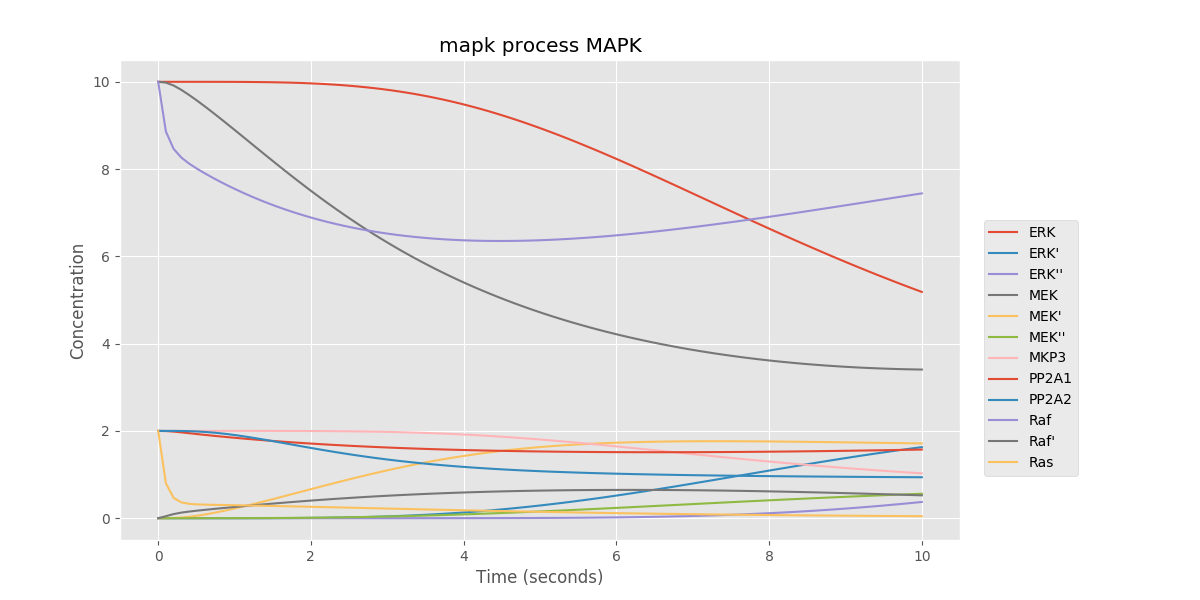

Picture will not be saved or you can change your selection.


In [6]:
solution = cpi_model.simulate_process('MAPK','odeint', 0, 10, 100)
solution.show_plot()